Tweed Analysis

Analyse satellite imagery across the Tweed-Byron region

In [1]:
%matplotlib inline

import sys
import datacube
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog
from odc.ui import with_ui_cbk

sys.path.insert(1, '../Tools/')
from dea_tools.plotting import display_map, rgb



In [2]:
dc = datacube.Datacube(app="Tweed Analysis")

In [3]:
display_map(x=(0,0), y=(0,0))

In [4]:
central_lat = -28.27
central_lon = 153.51

buffer = 0.1

tweed_lat = (central_lat - buffer, central_lat + buffer)
tweed_lon = (central_lon - buffer, central_lon + buffer)

display_map(x=tweed_lon, y=tweed_lat)

In [15]:
set_product = "ga_s2am_ard_3"

set_time = ("2020-01-01", "2020-03-01")

set_measurements = [
    "nbart_red",
    "nbart_green",
    "nbart_blue",
    "nbart_nir_1"
]

set_crs = "epsg:3577"
set_resolution = (-10, 10)

In [16]:
ds = dc.load(
    product=set_product,
    x=tweed_lon,
    y=tweed_lat,
    time=set_time,
    measurements=set_measurements,
    output_crs=set_crs,
    resolution=set_resolution,
    progress_cbk=with_ui_cbk(),
)

In [17]:
ds

<xarray.Dataset>
Dimensions:      (time: 6, y: 2537, x: 2288)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-06T23:54:32.848878 ... 2020-02...
  * y            (y) float64 -3.232e+06 -3.232e+06 ... -3.257e+06 -3.257e+06
  * x            (x) float64 2.064e+06 2.064e+06 ... 2.086e+06 2.086e+06
    spatial_ref  int32 3577
Data variables:
    nbart_red    (time, y, x) int16 6643 6546 6407 6260 6164 ... 75 87 93 97 72
    nbart_green  (time, y, x) int16 6534 6468 6382 6212 6111 ... 161 173 152 136
    nbart_blue   (time, y, x) int16 6645 6530 6373 6258 6182 ... 310 284 254 256
    nbart_nir_1  (time, y, x) int16 7574 7497 7412 7245 7133 ... 75 103 87 68 56
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

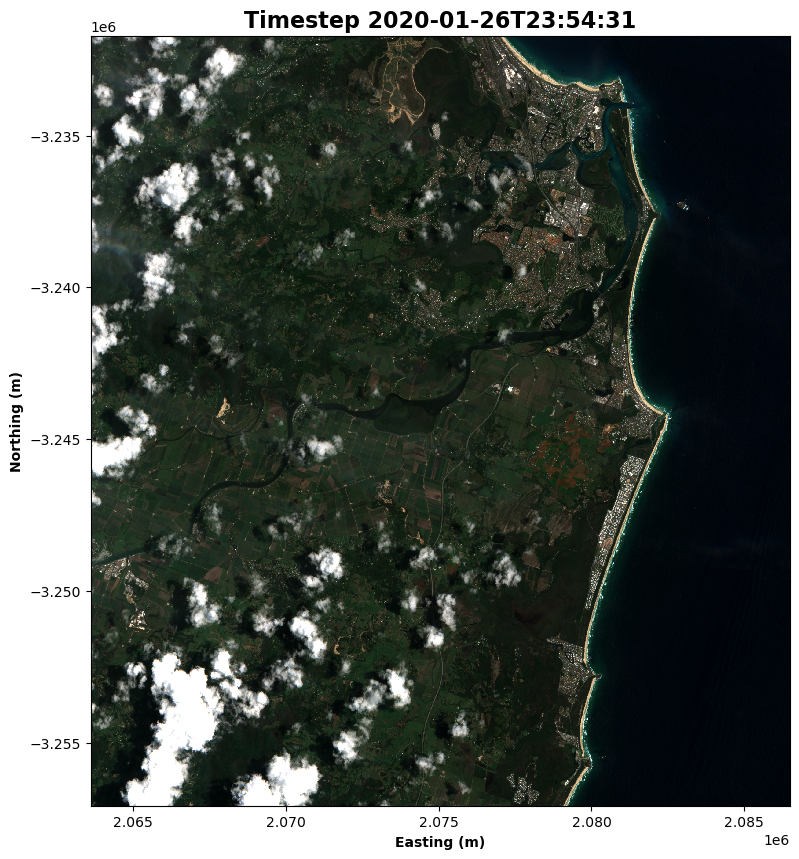

In [27]:
rgb_bands = ["nbart_red", "nbart_green", "nbart_blue"]
time_step = 2

rgb(ds,
    bands=rgb_bands,
    index=time_step,
    size=10
)

time_string = str(ds.time.isel(time=time_step).values).split('.')[0]
time_string

ax = plt.gca()
ax.set_title(f"Timestep {time_string}", fontweight="bold", fontsize=16)
ax.set_xlabel("Easting (m)", fontweight="bold")
ax.set_ylabel("Northing (m)", fontweight="bold")

plt.show()

In [29]:
#NDVI

band_diff = ds.nbart_nir_1 - ds.nbart_red
band_sum = ds.nbart_nir_1 + ds.nbart_red

ndvi = band_diff / band_sum

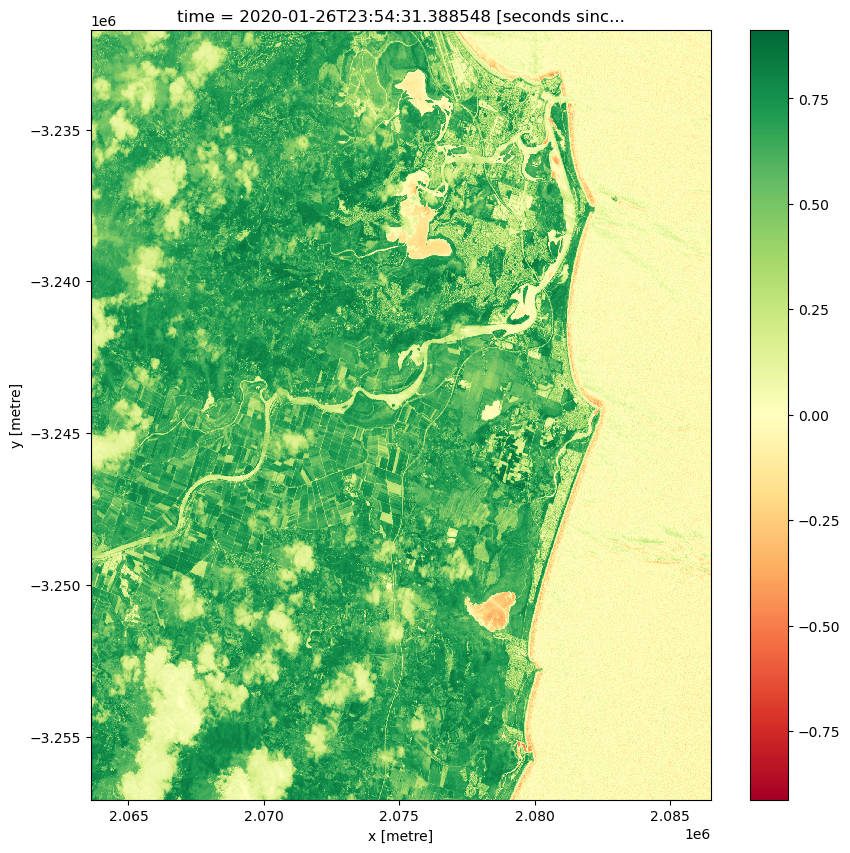

In [36]:
plt.figure(figsize=(10, 10))
ndvi.isel(time=time_step).plot(cmap="RdYlGn")
plt.show()

In [38]:
filename = "20200106_tweed_ndvi.tiff"

write_cog(geo_im=ndvi.isel(time=time_step), fname=filename, overwrite=True);